# Univariate Normal Distribution

Enter the range of X 
-3 5
 
Enter Mean and Variance 
0 1


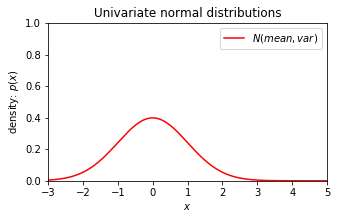

In [136]:
import numpy as np
import matplotlib.pyplot as plt


def univariate_normal(x, mean, variance):

    return ((1. / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance)))



# Plot different Univariate Normals
m,n=map(int,input("Enter the range of X \n").split())
print(" ")
x = np.linspace(m, n, num=150)
fig = plt.figure(figsize=(5, 3))
mean,var=map(int,input("Enter Mean and Variance \n").split())
plt.plot(x, univariate_normal(x, mean, var), label="$N(mean,var)$",color="Red")

plt.xlabel('$x$')
plt.ylabel('density: $p(x)$')
plt.title('Univariate normal distributions')
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
fig.subplots_adjust(bottom=0.15)
plt.show()

# Multivariate Normal Distribution

In [30]:
def multivariate_normal(x, d, mean, covariance):
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [32]:
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf 

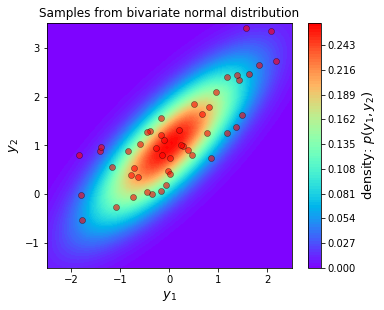

In [33]:
d = 2 # Number of random variables
mean = np.matrix([[0.], [1.]])
covariance = np.matrix([
    [1, 0.8], 
    [0.8, 1]
])

# Create L
L = np.linalg.cholesky(covariance)
#matrix([[1. , 0. ],
#        [0.8, 0.6]])
    
# Sample X from standard normal
n = 50  # Samples to draw
X = np.random.normal(size=(d, n))
# shape of X is (2, 50)

# Apply the transformation
Y = L.dot(X) + mean
# shape of Y is (2, 50)

# Plot the samples and the distribution
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution
x1, x2, p = generate_surface(mean, covariance, d)
con = ax.contourf(x1, x2, p, 100, cmap='rainbow')
# Plot samples
ax.plot(Y[0,:], Y[1,:], 'ro', alpha=.6,
        markeredgecolor='k', markeredgewidth=0.5)
ax.set_xlabel('$y_1$', fontsize=13)
ax.set_ylabel('$y_2$', fontsize=13)
ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=13)
#plt.savefig('sampling_from_multivariate_normal_distribution')
plt.show()

# Exponential Distribution

In [101]:
def exponential(x,lamb):
    cdf=[]
    for i in x:
        if i<=0:
            cdf.append(0)
        else:
            cdf.append(lamb*np.exp(-lamb*i))
    return cdf

Enter the range of X 
0 20
 
Enter value of lambda0.2


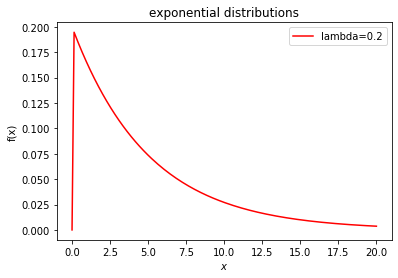

In [102]:
m,n=map(int,input("Enter the range of X \n").split())
print(" ")
x = np.linspace(m, n, num=150)
#print(x)
lam=float(input("Enter value of lambda"))
z=exponential(x,lam)

plt.plot(x,z,label="lambda={}".format(lam),color="Red")
plt.xlabel('$x$')
plt.ylabel('f(x)')
plt.title('exponential distributions')
plt.legend(loc=1)
fig.subplots_adjust(bottom=0.15)
plt.show()

# Uniform Distribution 

In [71]:
def CDFUniform( a,b,x ):
    cdf=[]
    for i in x:
        if i>=a and i<=b:
            cdf.append(1/(b-a))
        elif i>=b:
            cdf.append(0)
        else:
            cdf.append(0)
    return cdf

Enter the range of X 
0 10
 
Enter value of a and b
3 7


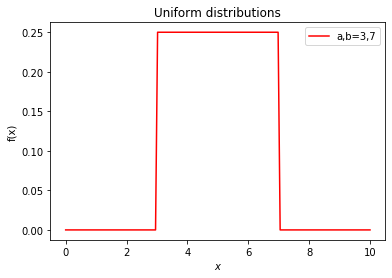

In [135]:
m,n=map(int,input("Enter the range of X \n").split())
print(" ")
x = np.linspace(m, n, num=150)
#print(x)
a,b=map(int,input("Enter value of a and b\n").split())
z=CDFUniform(a,b,x)

plt.plot(x,z,label="a,b={},{}".format(a,b),color="Red")
plt.xlabel('$x$')
plt.ylabel('f(x)')
plt.title('Uniform distributions')
plt.legend(loc=1)
fig.subplots_adjust(bottom=0.15)
plt.show()

# Gamma Distribution

Gamma Distribution

Number of alpha and beta parameters
4
input alpha and beta1 1
input alpha and beta2 1
input alpha and beta3 1
input alpha and beta2 2


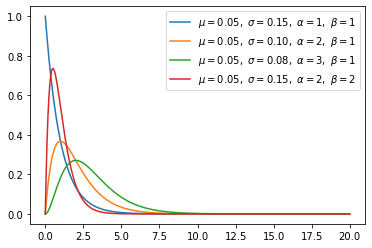

In [131]:
import numpy as np
from matplotlib import pyplot as plt
print("Gamma Distribution\n")
def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

def gamma(x, a, b):
    c = (b ** a) / gamma_function(a)
    y = c * (x ** (a - 1)) * np.exp(-b * x)
    return x, y, np.mean(y), np.std(y)


k=int(input("Number of alpha and beta parameters\n"))
m=[]
for i in range(k):
    o,p=map(int,input("input alpha and beta").split())
    m.append((o,p))
#[(1, 1), (2, 1), (3, 1), (2, 2)]
for ls in m:
    a, b = ls[0], ls[1]

    x = np.arange(0, 20, 0.01, dtype=np.float)
    x, y, u, s = gamma(x, a=a, b=b)
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f,'
                         r'\ \alpha=%d,\ \beta=%d$' % (u, s, a, b))
plt.legend()

plt.show()

# Beta Distribution

Beta Distribution
Number of alpha and beta parameters
4
Input alpha and beta1 3
Input alpha and beta5 1
Input alpha and beta2 2
Input alpha and beta2 5


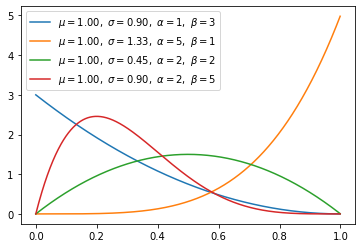

In [132]:
print("Beta Distribution")
def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

def beta(x, a, b):

    gamma = gamma_function(a + b) / \
            (gamma_function(a) * gamma_function(b))
    y = gamma * (x ** (a - 1)) * ((1 - x) ** (b - 1))
    return x, y, np.mean(y), np.std(y)

k=int(input("Number of alpha and beta parameters\n"))
m=[]
for i in range(k):
    o,p=map(int,input("Input alpha and beta").split())
    m.append((o,p))
#[(1, 3), (5, 1), (2, 2), (2, 5)]
for ls in m:
    a, b = ls[0], ls[1]

    # x in [0, 1], trial is 1/0.001 = 1000
    x = np.arange(0, 1, 0.001, dtype=np.float)
    x, y, u, s = beta(x, a=a, b=b)
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f,'
                         r'\ \alpha=%d,\ \beta=%d$' % (u, s, a, b))
plt.legend()
#plt.savefig('graph/beta.png')
plt.show()

# Binomial Distribution

Number values of n and p to be plotted
1
input p and n
0.5 20


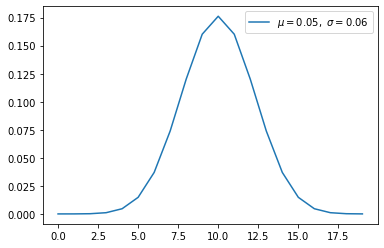

In [128]:
import operator as op
from functools import reduce

def const(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom

def binomial(n, p):
    q = 1 - p
    y = [const(n, k) * (p ** k) * (q ** (n-k)) for k in range(n)]
    return y, np.mean(y), np.std(y)


k=int(input("Number values of n and p to be plotted\n"))
m=[]
for i in range(k):
    o,p=map(float,input("input p and n\n").split())
    m.append((o,p))

#[(0.5, 20), (0.7, 40), (0.5, 40)]
for ls in m:
    p, n_experiment = ls[0], int(ls[1])
    x = np.arange(n_experiment)
    y, u, s = binomial(n_experiment, p)
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))

plt.legend()
#plt.savefig('graph/binomial.png')
plt.show()

# Poission Distribution

In [121]:
def poission(k,lamb):
    cdf=[]
    for i in k:
        cdf.append(((lamb**i)*np.exp(-lamb))/math.factorial(i))
        
    return cdf   

Enter the range of x 
0 10
 
Enter value of lambda1


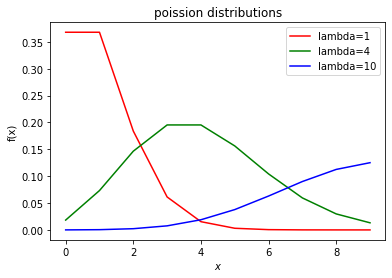

In [127]:
m,n=map(int,input("Enter the range of x \n").split())
print(" ")
x = np.arange(m, n)

#print(x)
lam=int(input("Enter value of lambda"))
z=poission(x,lam)
y=poission(x,4)
w=poission(x,10)
plt.plot(x,z,label="lambda={}".format(lam),color="Red")
plt.plot(x,y,label="lambda={}".format(4),color="Green")
plt.plot(x,w,label="lambda={}".format(10),color="Blue")
plt.xlabel('$x$')
plt.ylabel('f(x)')
plt.title('poission distributions')
plt.legend(loc=1)
fig.subplots_adjust(bottom=0.15)
plt.show()